# Modelo de IA que detecta si alguien esta usando o no anteojos a traves de una

Vamos a recibir una imagen de una cara y vamos a poder, a traves de una red neuronal convolucional, detectar si esta persona tiene puestos anteojos (en este caso nuestro modelo devuelve 0) y si no los tiene puestos en el momento (donde devolveria 1).

In [6]:
# Importamos las librerías
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [2]:
# Función para convertir las imágenes a escala de grises.
def convert_to_grayscale(image, label):
    image = tf.image.rgb_to_grayscale(image)
    return image, label

In [7]:
# Cargamos los datos, seteamos la resolución de las imagenes y el tamaño del batch.
data_dir = 'Caras/'
batch_size = 32
img_height = 180
img_width = 180

# Seteamos los datos de entrenamiento y validación:
# Dataset del training.
train_ds = tf.keras.utils.image_dataset_from_directory(
    # Directorio de los datos.
    data_dir,
    # Especificamos el split.
    validation_split=0.2,
    # Especificamos el subset: 'training'.
    subset="training",
    seed=123,
    # Especificamos el tamaño de las imagenes.
    image_size=(img_height, img_width),
    # Especificamos el tamaño del batch. Convierte el dataset a 'grayscale'.   
    batch_size=batch_size).map(convert_to_grayscale)

# Dataset de validation.
val_ds = tf.keras.utils.image_dataset_from_directory(
    # Directorio de los datos.
    data_dir,
    # Especificamos el split.
    validation_split=0.2,
    # Especificamos el subset: 'training'.
    subset="validation",
    seed=123,
    # Especificamos el tamaño de las imagenes.
    image_size=(img_height, img_width),
    # Especificamos el tamaño del batch. Convierte el dataset a 'grayscale'.   
    batch_size=batch_size).map(convert_to_grayscale)

Found 4000 files belonging to 2 classes.
Using 3200 files for training.
Found 4000 files belonging to 2 classes.
Using 800 files for validation.


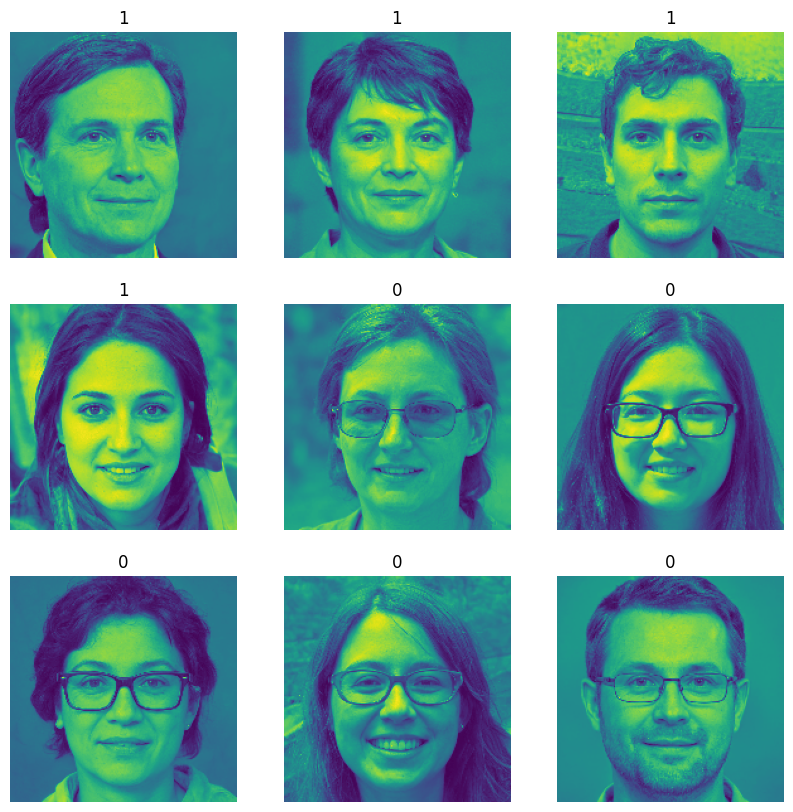

In [8]:
#Demostracion de algunas imagenes del dataset.
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        # Seleccionamos la imagen.
        ax = plt.subplot(3, 3, i + 1)
        # Mostramos la imagen.
        plt.imshow(images[i].numpy().astype("uint8"))
        # Mostramos la etiqueta.
        plt.title(int(labels[i]))
        # Ocultamos los ejes.
        plt.axis("off")

In [29]:
# Arquitectura del modelo en forma sequencial (osea capa por capa):
model = models.Sequential([
    #Utiliza 8 kernels de tamaño 3x3. 
    #La convolución con estos kernels le permite a la red detectar características básicas como bordes, colores y texturas. 
    #El padding es 'same' para que la imagen de salida tenga el mismo tamaño que la de entrada.
    layers.Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(180, 180, 1)),
    #MaxPooling reduce el tamaño de la imagen de salida a la mitad al tomar el valor máximo de cada kernel de 2x2 píxeles.
    layers.MaxPooling2D((2,2)),

    #Lo mismo que la capa anterior pero con 16 kernels para ahora detectar patrones mas complejos.
    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),

    #Convierte la matriz de 2D a 1D asi el resto de la red puede procesarla.
    layers.Flatten(),

    #Capa de 32 neuronas con función de activación 'relu'.
    layers.Dense(32, activation='relu'),

    #Le agregamos un dropout entre esta capa y la anterior para evitar el overfitting.
    #Este tiene un 75% de probabilidad de desactivar una conexión entre dos neuronas.
    layers.Dropout(0.75),
    #Capa de 16 neuronas con función de activación 'relu'.
    layers.Dense(16, activation='relu'),

    #Capa final con una sola neurona y función de activación 'sigmoid' ya que esta nos devuelve un valor entre 0 y 1.
    layers.Dense(1, activation='sigmoid')
])

In [30]:
# Compilamos el modelo.
model.compile(
    # Especificamos un optimizador: 'Adam()'. 
    optimizer='adam',
    # Especificamos una función de loss, 
    loss=tf.keras.losses.binary_crossentropy,
    # Seteamos 'accuracy' como metrica de monitoreo
    metrics=['accuracy']
)

In [ ]:
#Training del Modelo.
#Seteamos los epochs.
epochs = 5
history = model.fit(
    # Especificamos el dataset de entrenamiento.
    train_ds,
    # Especificamos el número de epochs.
    epochs=epochs
)

In [34]:
model = tf.keras.models.load_model('model.h5')

In [35]:
# Evaluamos el modelo con los datos de validation.
loss, acc = model.evaluate(val_ds)
# Guardamos la precisión y la loss del modelo, y mostramos la precisión.
print("Accuracy", str(acc * 100) + "%")

25/25 [==============================] - 1s 29ms/step - loss: 0.1309 - accuracy: 0.9937
Accuracy 0.9937499761581421


In [ ]:
# Ejemplos de salida del modelo.
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    for i in range(9):
        # Seleccionamos la imagen.
        ax = plt.subplot(3, 3, i + 1)
        # Mostramos la imagen.
        plt.imshow(images[i].numpy().astype("uint8"))
        # Mostramos la etiqueta.
        plt.title(int(labels[i]))
        # Ocultamos los ejes.
        plt.axis("off")

In [ ]:
# Guardamos el modelo en un archivo '.h5'.
model.save('model.h5')